In [77]:
import pandas as pd
import numpy as np
import plotly.express as px

months = {
        1: 'Январе',
        2: 'Феврале',
        3: 'Марте',
        4: 'Апреле',
        5: 'Мае',
        6: 'Июне',
        7: 'Июле',
        8: 'Августе',
        9: 'Сентябре',
        10: 'Октябре',
        11: 'Ноябре',
        12: 'Декабре'
    }

# Предобработка данных

## Тарифы

In [2]:
tariffs = pd.read_csv('tariffs.csv')
tariffs.info()
tariffs.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
1,1000,30720,3000,1950,150,1,1,ultra
0,50,15360,500,550,200,3,3,smart


## Пользователи

In [3]:
users = pd.read_csv('users.csv')
users.info()
users.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
27,1027,62,NaN,Петрозаводск,Владислав,Авдеев,2018-04-10,smart
130,1130,58,NaN,Тюмень,Инара,Крюкова,2018-04-01,smart



Статистическое описание датафрейма "Пользователи" позволяет сделать следующие выводы:      
- Средний возраст пользователей - 46 лет      
- Возрастные рамки соблюдаются: возраст пользователей от 18 до 75-ти лет - аномальные значения отсутствуют      
- Подавляющее большинство пользователей - люди в возрасте от 32 до 60-ти лет      
- Стандартное отклонение возраста показывает, что возраст пользователей довольно сильно рассеян относительно среднего. Также это показывает гистограмма распределения возраста      
- Тариф "Смарт" лидирует в количестве пользователей: их на нем 70%      



,age
count,500.00000
mean,46.58800
std,16.66763
min,18.00000
25%,32.00000
50%,46.00000
75%,62.00000
max,75.00000


<AxesSubplot:>

,churn_date,city,first_name,last_name,reg_date,tariff
count,38,500,500,500,500,500
unique,33,76,246,419,270,2
top,2018-10-03,Москва,Радим,Андреенко,2018-05-28,smart
freq,2,99,6,5,8,351


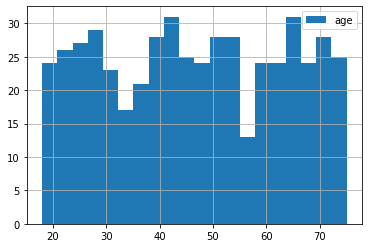

In [4]:
print(f'\nСтатистическое описание датафрейма "Пользователи" позволяет сделать следующие выводы:\
      \n- Средний возраст пользователей - 46 лет\
      \n- Возрастные рамки соблюдаются: возраст пользователей от 18 до 75-ти лет - аномальные значения отсутствуют\
      \n- Подавляющее большинство пользователей - люди в возрасте от 32 до 60-ти лет\
      \n- Стандартное отклонение возраста показывает, что возраст пользователей довольно сильно рассеян относительно среднего. Также это показывает гистограмма распределения возраста\
      \n- Тариф "Смарт" лидирует в количестве пользователей: их на нем {round(users.describe(include=["object"]).iloc[-1,-1]/users.describe(include=["object"]).iloc[0,-1]*100)}%\
      \n')
      
display(users.describe()['age'].to_frame(), users.age.hist(bins=20, legend=True), users.describe(include=['object']))

## Звонки

In [5]:
calls = pd.read_csv('calls.csv')
calls.info()
calls.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
126559,1324_692,2018-11-28,0.00,1324
58468,1147_183,2018-08-09,8.04,1147



Статистическое описание датафрейма "Звонки" позволяет сделать следующие выводы:      
- Средняя длительность звонка - 6 минут 45 секунд      
- Стандартное отклонение показывает, что разброс длительности звонков очень велик, и показатель средней длительности не отражает реальное положение вещей      
Также это показывает гистограмма распределения длительноси звонков      
- Четверть звонков всего набора данных - пропущенные, о чем свидетельствует первый квартиль и инфо о топе по количеству звонков каждого значения длительности      
- Самый популярный день по количеству звонков - Новый год - 31-ое декабря 🎄      



,duration
count,202607.000000
mean,6.755887
std,5.843365
min,0.000000
25%,1.300000
50%,6.000000
75%,10.700000
max,38.000000


<AxesSubplot:>

,duration
0.00,39613
5.50,142
4.49,142
6.15,141
6.38,141


,id,call_date
count,202607,202607
unique,202607,365
top,1414_287,2018-12-31
freq,1,1435


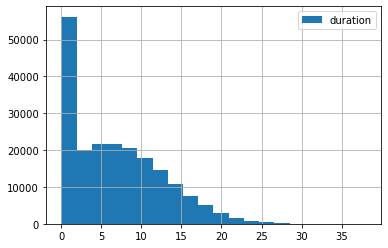

In [6]:
print(f'\nСтатистическое описание датафрейма "Звонки" позволяет сделать следующие выводы:\
      \n- Средняя длительность звонка - 6 минут 45 секунд\
      \n- Стандартное отклонение показывает, что разброс длительности звонков очень велик, и показатель средней длительности не отражает реальное положение вещей\
      \nТакже это показывает гистограмма распределения длительноси звонков\
      \n- Четверть звонков всего набора данных - пропущенные, о чем свидетельствует первый квартиль и инфо о топе по количеству звонков каждого значения длительности\
      \n- Самый популярный день по количеству звонков - Новый год - 31-ое декабря 🎄\
      \n')

display(calls.describe()['duration'].to_frame(), calls.duration.hist(bins=20, legend=True), calls.duration.value_counts().to_frame().head(5), calls.describe(include=['object']))

## Интернет

In [7]:
internet = pd.read_csv('internet.csv')
internet.info()
internet.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
62822,62822,1213_204,843.47,2018-11-30,1213
6325,6325,1020_62,341.12,2018-11-06,1020



Статистическое описание датафрейма "Интернет" позволяет сделать следующие выводы:      
- Средний объем израсходованного интернет-трафика за сессию - 370 мб      
- Стандартное отклонение показывает, что разброс длительности составляет 75% от среднего, что свидетельствует о малозначащем смысле среднего значения      
О чем также свидетельствует гистограмма распределения объама расходуемого трафика за сессию      
- Расход более 75% сессий составляет не более до 600 мб трафика      
- Полярными датами по количеству сессий являются 2018-12-31 - самое наибольшее и 2018-01-01 - самое наименьшее.      
В первом случае это связано с предновогодней суетой и постоянным времяпрепровождением в интернете в поисках подарков, и рецептов к новогоднему столу      
Во втором - с моральной усталостью после праздника и желанием побыть с семьей/прогуляться на свежем воздухе



,mb_used
count,149396.000000
mean,370.192426
std,278.300951
min,0.000000
25%,138.187500
50%,348.015000
75%,559.552500
max,1724.830000


<AxesSubplot:>

,id,session_date
count,149396,149396
unique,149396,365
top,1414_287,2018-12-31
freq,1,1057


,session_date
2018-12-31,1057
2018-01-01,3


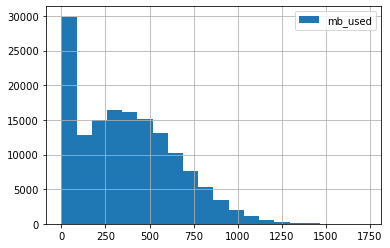

In [8]:
print(f'\nСтатистическое описание датафрейма "Интернет" позволяет сделать следующие выводы:\
      \n- Средний объем израсходованного интернет-трафика за сессию - 370 мб\
      \n- Стандартное отклонение показывает, что разброс длительности составляет 75% от среднего, что свидетельствует о малозначащем смысле среднего значения\
      \nО чем также свидетельствует гистограмма распределения объама расходуемого трафика за сессию\
      \n- Расход более 75% сессий составляет не более до 600 мб трафика\
      \n- Полярными датами по количеству сессий являются 2018-12-31 - самое наибольшее и 2018-01-01 - самое наименьшее.\
      \nВ первом случае это связано с предновогодней суетой и постоянным времяпрепровождением в интернете в поисках подарков, и рецептов к новогоднему столу\
      \nВо втором - с моральной усталостью после праздника и желанием побыть с семьей/прогуляться на свежем воздухе\n')
      
display(internet.describe()['mb_used'].to_frame(), internet.mb_used.hist(bins=20, legend=True), internet.describe(include=['object']), internet.session_date.value_counts().to_frame().iloc[[0,-1], :])

## Сообщения

In [9]:
messages = pd.read_csv('messages.csv')
messages.info()
messages.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
16554,1072_52,2018-03-27,1072
86898,1358_527,2018-08-29,1358


In [10]:
print(f'\nСтатистическое описание датафрейма "Сообщения" позволяет сделать следующие выводы:\
      \n- Сообщения посылаются почти каждый день\
      \n- Больше всего в 31 декабря - 859 раз - поздравления с Новым годом\
      \n')
      
display(messages.describe(include=['object']), 
        messages.message_date.value_counts().to_frame().iloc[[0,-1], :])


Статистическое описание датафрейма "Сообщения" позволяет сделать следующие выводы:      
- Сообщения посылаются почти каждый день      
- Больше всего в 31 декабря - 859 раз - поздравления с Новым годом      



,id,message_date
count,123036,123036
unique,123036,364
top,1067_519,2018-12-31
freq,1,859


,message_date
2018-12-31,859
2018-01-03,4


## Объединенные данные 

### Пользователи-звонки

In [11]:
users_calls = users.merge(calls, how='left', on='user_id')
users_calls.sample(2)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,id,call_date,duration
193707,1475,40,NaN,Новокузнецк,Лидия,Фадеева,2018-01-09,smart,1475_369,2018-08-11,15.20
103872,1266,32,NaN,Калуга,Тала,Антропова,2018-07-20,smart,1266_166,2018-09-07,7.89


####    
  
  
####  Приведение столбцы с датой к соответствующему типу и округление длительности разговора до минут 

In [12]:
users_calls['churn_date_dt'] = pd.to_datetime(users_calls['churn_date'])    
users_calls['reg_date_dt'] = pd.to_datetime(users_calls['reg_date'])    
users_calls['call_date_dt'] = pd.to_datetime(users_calls['call_date'])    

users_calls['duration_ceil'] = users_calls['duration'].apply(np.ceil)

####    
  
  
####  Количество сделанных звонков и израсходованных минут разговора по месяцам

In [42]:
users_calls_pivot = users_calls.pivot_table(index=users_calls.call_date_dt.dt.month, values=['duration_ceil'], aggfunc=['count', 'sum'])
users_calls_pivot.columns = users_calls_pivot.columns.droplevel()
users_calls_pivot = users_calls_pivot.reset_index()
users_calls_pivot = users_calls_pivot.set_axis(['date', 'count_calls', 'total_duration'], axis=1, inplace=False)
users_calls_pivot
#.plot(kind='hist', subplots=True)

,date,count_calls,total_duration
0,1.0,1476,10784.0
1,2.0,3328,24455.0
2,3.0,6687,48151.0
3,4.0,9272,66310.0
4,5.0,12647,88810.0
5,6.0,14716,105180.0
6,7.0,18298,131746.0
7,8.0,21488,153698.0
8,9.0,24061,173475.0
9,10.0,27146,193928.0


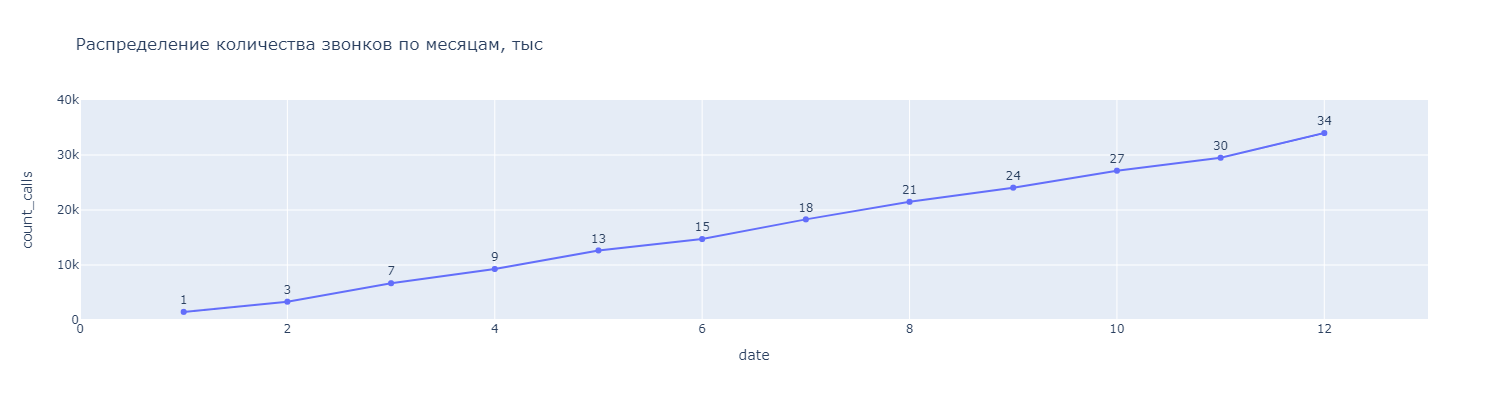

In [84]:
fig = px.line(users_calls_pivot, 
                   x='date',
                   y='count_calls',
                title="Распределение количества звонков по месяцам, тыс",
              text=round(users_calls_pivot.count_calls/1000),
                   width=800, 
                   height=400)


fig.update_traces(textposition='top center', hovertemplate="<br>".join([
        "Месяц: %{x}",
        "Количество: %{y}"]))

fig.update(layout_xaxis_range = [0,13], layout_yaxis_range = [-1,40000])
fig.show()

In [ ]:
users_calls.call_date_dt.dt.month.sort_values().hist(bins=4)

In [ ]:
users_calls.call_date_dt.hist(
    bins=[pd.Timestamp('2018-01-01'),
          pd.Timestamp('2018-03-01'), 
          pd.Timestamp('2018-06-01'), 
          pd.Timestamp('2018-09-01'), 
          pd.Timestamp('2018-11-01')], 
    alpha=0.7,
    figsize=(10,5)
)

Подсчитать количество сделанных звонков и израсходованных минут разговора по месяцам

### Пользователи-интернет

In [ ]:
users_internet = users.merge(internet, how="left", on='user_id')
users_internet.sample(2)

### Пользователи-сообщения

In [14]:
users_messages = users.merge(messages, how="left", on='user_id')
users_messages.sample(2)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,id,message_date
60171,1265,24,2018-10-04,Омск,Радим,Адамов,2018-06-24,ultra,1265_21,2018-10-01
30292,1133,70,NaN,Барнаул,Надежда,Аникина,2018-10-19,smart,1133_57,2018-11-25
